# Задание

Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных. Успеха!

In [3]:
#pip install seaborn

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [34]:
# Создаём сэмпл
n_samples = 1000

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,108,123,46,565926
1,42,27,70,189126
2,102,42,69,289926
3,28,18,81,145926
4,99,67,21,140826


In [67]:
n_samples = 10000

car_age = np.random.choice(np.arange(1,15),n_samples)
car_odometer = np.random.choice(np.arange(10000,150000),n_samples)
car_o_price = np.random.choice(np.arange(30000,50000),n_samples)
car_length = np.random.choice(6000, n_samples) + 15
car_width = np.random.choice(2000, n_samples) + 10

car_price = np.rint(car_o_price * (1 - (car_odometer*car_age/22500000)))

data = pd.DataFrame({'car_age': car_age, 'car_odometer': car_odometer, 'car_o_price': car_o_price, 'car_length': car_length, 'car_width': car_width, 'car_price':car_price})
data.head(10)

,car_age,car_odometer,car_o_price,car_length,car_width,car_price
0,11,83445,32660,4309,1335,31328.0
1,8,134328,35840,1872,46,34128.0
2,8,101134,45959,827,847,44306.0
3,3,17121,47296,3376,1670,47188.0
4,3,136781,37295,2294,39,36615.0
5,6,105882,31198,3008,1800,30317.0
6,4,53203,37340,4326,75,36987.0
7,14,10943,30726,4579,141,30517.0
8,3,48580,48335,5321,1190,48022.0
9,8,38996,45061,1448,983,44436.0


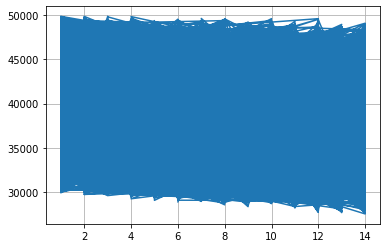

In [68]:
plt.plot(car_age, car_price, label = "price(car_age)")
plt.grid()
plt.show()

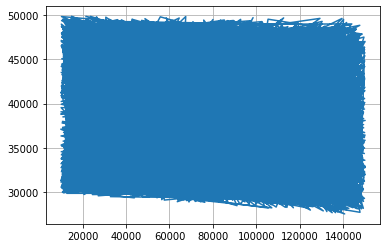

In [69]:
plt.plot(car_odometer, car_price, label = "price(car_odometer)")
plt.grid()
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error

X = data[['car_age', 'car_odometer', 'car_o_price', 'car_length', 'car_width']]
y = data['car_price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['car_age', 'car_odometer', 'car_o_price', 'car_length', 'car_width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.42627650e+02 -1.33142426e-02  9.72705564e-01  4.87254771e-03
  1.56722644e-03]
Bias: 2145.7798368026124
Error: 230.7001042950507


In [71]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(data[['car_age', 'car_odometer', 'car_o_price', 'car_length', 'car_width']])
y = data['car_price']

poly.get_feature_names()

C:\users\emaxkra\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2']

In [72]:
reg_2 = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['car_age', 'car_odometer', 'car_o_price', 'car_length', 'car_width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.42627650e+02 -1.33142426e-02  9.72705564e-01  4.87254771e-03
  1.56722644e-03]
Bias: 2145.7798368026124
Error: 230.7001042950507
